# Proyecto energía analisis bivariado

## Integrantes

- Enrique Laguna Diaz
- Hector Aaron Ramirez Obregon
- Humberto Peñuelas Almeida

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Importar datos del nuevo csv con datos limpiados

In [8]:
path = "Clean_Energy.csv"
energia_df = pd.read_csv(path,sep=",",encoding="utf-8")

In [9]:
energia_df

,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...,...
496769,10581,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,10582,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,10583,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,10584,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


array(['Total Electric Power Industry',
       'Electric Generators, Electric Utilities',
       'Combined Heat and Power, Electric Power',
       'Combined Heat and Power, Commercial Power',
       'Combined Heat and Power, Industrial Power',
       'Electric Generators, Independent Power Producers'], dtype=object)

numpy.ndarray

LabelEncoder()

['Combined Heat and Power, Commercial Power',
 'Combined Heat and Power, Electric Power',
 'Combined Heat and Power, Industrial Power',
 'Electric Generators, Electric Utilities',
 'Electric Generators, Independent Power Producers',
 'Total Electric Power Industry']

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

<AxesSubplot:xlabel='y'>

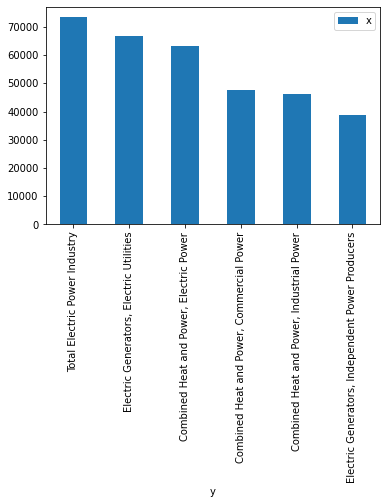

In [15]:
producer_type = energia_df['TYPE OF PRODUCER'].unique()
producer_type
type(producer_type)
TEPI = energia_df.loc[energia_df['TYPE OF PRODUCER'] == 'Total Electric Power Industry']

# tranformar variables no numericas a numericas
le = preprocessing.LabelEncoder()
le.fit(producer_type)

list(le.classes_)

numeric_producer_type = le.transform(producer_type)
#np.sort(numeric_producer_type)

energy_sr = energia_df['ENERGY SOURCE'].unique()
energy_sr

count_producers = energia_df['ENERGY SOURCE'].value_counts()
num_producers = count_producers.values
#np.sort(num_producers)

df = pd.DataFrame({'x':num_producers[:6], 'y': producer_type[:6]})
#df.sort_values(by=['x', 'y'])
df.plot('y','x', kind='bar')

In [27]:
energyYear2020 = energia_df.loc[(energia_df['ENERGY SOURCE'] == 'Coal')]
energyYear2020[['YEAR','STATE','TYPE OF PRODUCER','ENERGY SOURCE','GENERATION']]
#print(energyYear2020)

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,2001,AK,Total Electric Power Industry,Coal,46903.0
6,2001,AK,"Electric Generators, Electric Utilities",Coal,18410.0
12,2001,AK,"Combined Heat and Power, Electric Power",Coal,19742.0
15,2001,AK,"Combined Heat and Power, Commercial Power",Coal,8751.0
21,2001,AL,Total Electric Power Industry,Coal,6557913.0
...,...,...,...,...,...
496743,2022,WV,"Electric Generators, Electric Utilities",Coal,2979573.0
496748,2022,WY,Total Electric Power Industry,Coal,2149413.0
496757,2022,WY,"Combined Heat and Power, Industrial Power",Coal,22823.0
496763,2022,WY,"Electric Generators, Independent Power Producers",Coal,55187.0
